# STDSR - optional assignment
> Dautov Almaz, B21-DS-02
# Patterns in DNA


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

DNA_data = []

with open('hcmv.data.txt', 'r') as file:
    for line in file:
        DNA_data.append(int(line.rstrip()))

# Define the length of the DNA sequence
dna_length = 229354

# Define the number of palindromes to simulate
num_palindromes = 296

# Generate a list of random palindrome locations
size = 5
random_uniform_data = []

for i in range(size):
    random_uniform_data.append(np.sort(np.random.randint(1, dna_length + 1, num_palindromes)))


### Random scatter.
To investigate the potential presence of structure in the DNA data, we can begin by analyzing deviations from a uniform scatter of palindromes across the DNA. Generated five random uniformly distributed sequences are plotted alongside the DNA sequence. This allows to compare the distribution of the DNA sequence with that of the random uniform distribution and identify any patterns or trends that may indicate non-randomness.

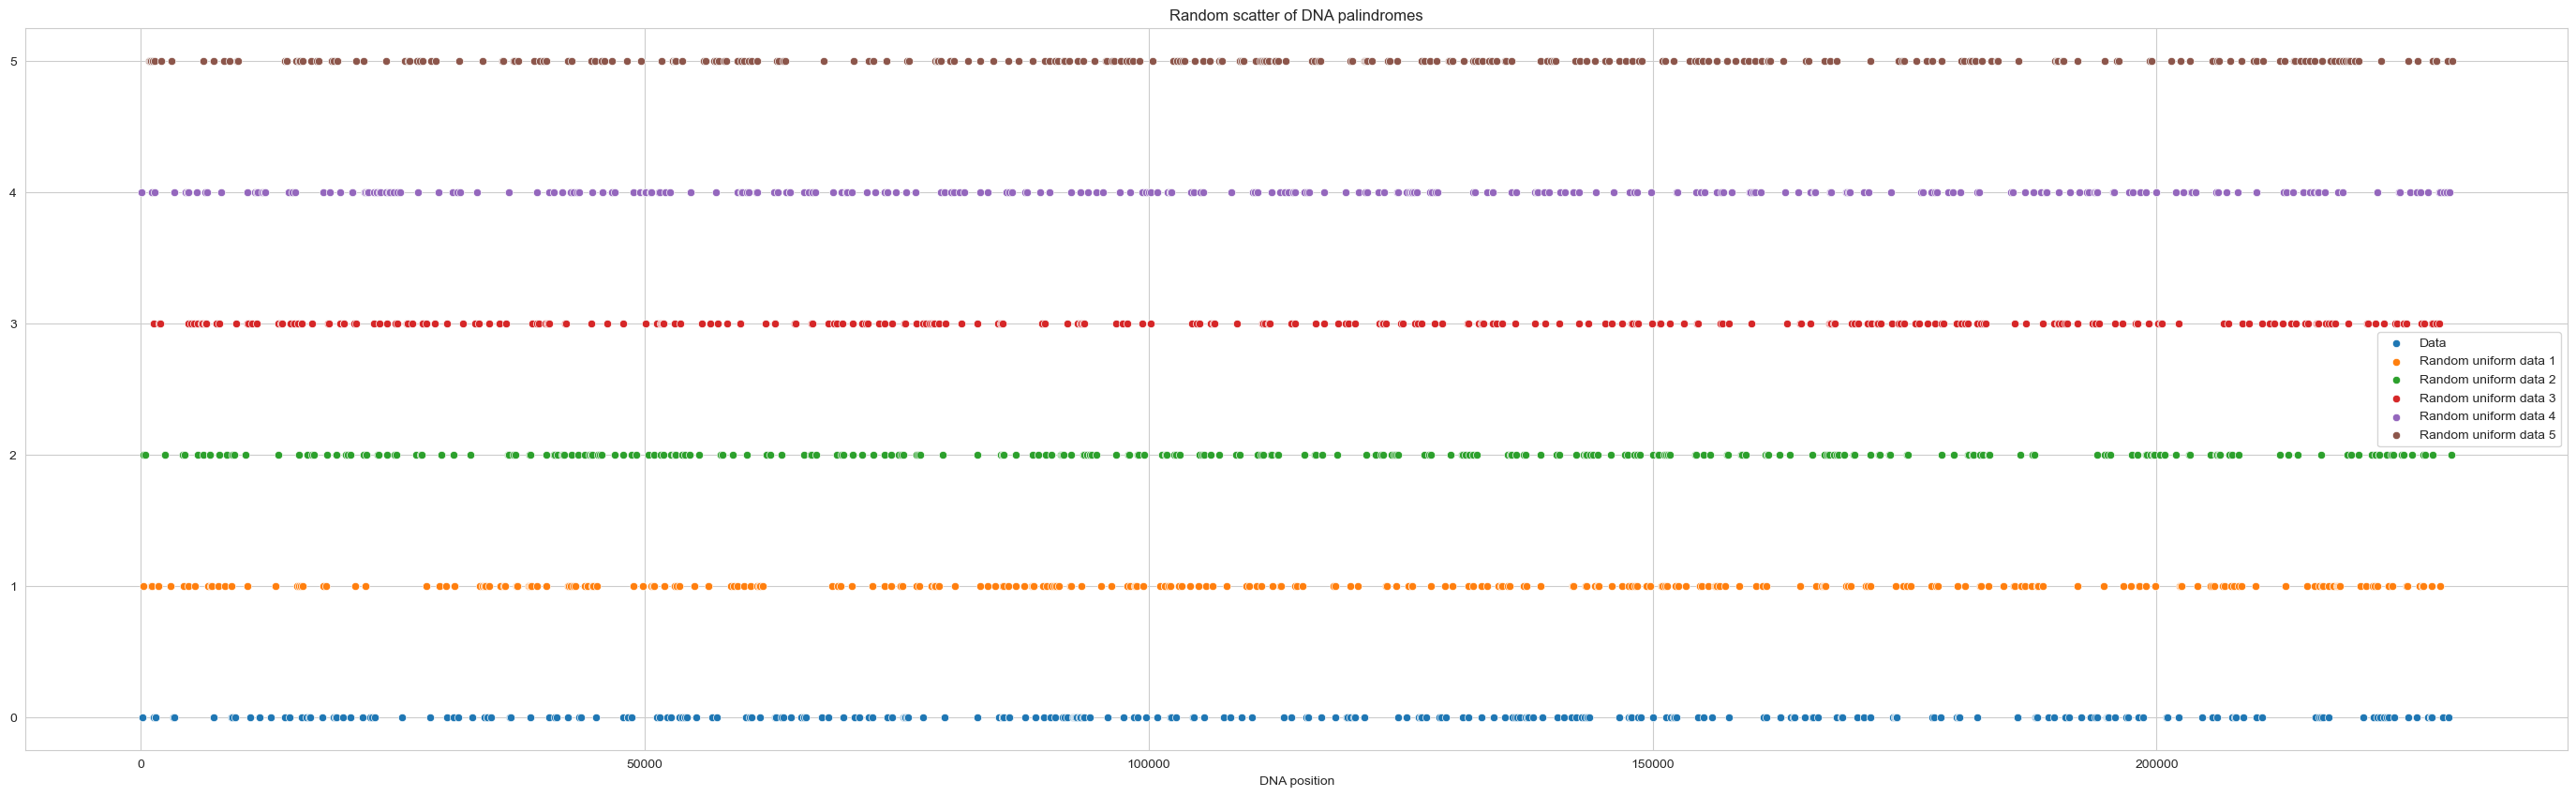

In [2]:
plt.figure(figsize=(35,10))
sns.scatterplot(x=DNA_data,y=np.zeros(num_palindromes), label='Data')
for i in range(size):
    sns.scatterplot(x= random_uniform_data[i],y= np.zeros(num_palindromes) + i + 1, label='Random uniform data ' + str(i + 1))
plt.xlabel('DNA position')
plt.title('Random scatter of DNA palindromes')
plt.show()

However, no significant differences are observed, so the chi-squared test may be performed to provide a more formal statistical assessment of the randomness of the distribution.

The null hypothesis is that the palindromes are uniformly scattered across the DNA sequence, and the alternative hypothesis is that the palindromes are not uniformly scattered across the DNA sequence, the level of significance is set to 0.05.


In [3]:
from scipy.stats import chisquare

# observed palindromes in DNA
observed = DNA_data.copy()

# expected palindromes assuming uniform random scatter
total = sum(observed)
num_intervals = len(observed)
expected = total / num_intervals
expected = np.full(num_intervals, expected)

# perform chi-squared goodness-of-fit test
_, p_value = chisquare(observed, expected)

if p_value < 0.05:
    print("Reject null hypothesis of uniform random scatter")
else:
    print("Fail to reject null hypothesis of uniform random scatter")

Reject null hypothesis of uniform random scatter


### Locations and spacings.
The spacing between consecutive palindromes and sums of consecutive pairs, triplets, and so on were calculated for the CMV DNA. This analysis aimed to compare the observed results with what would be expected in a random scatter. Graphical techniques were also utilized to examine the locations of the palindromes in the DNA to identify any patterns or structures that might be present in the data.

In [4]:
def plot_spacing(DNA_data, random_uniform_data):

    def calculate_spacings(data, size_of_group):
        spacings = []
        right = size_of_group - 1
        left = right + 1

        while left < len(data):
            spacings.append(data[left] - data[right])
            right += size_of_group
            left = right + 1
        return spacings


    #number of groups
    n = 6
    groups = [i + 1 for i in range(n)]

    rows, cols = 2, 3
    fig, axs = plt.subplots(rows, cols, figsize=(30, 10))
    fig.suptitle('Histograms of spacings between consecutive palindromes')

    for i, group_size in enumerate(groups):
        DNA_spacings = calculate_spacings(DNA_data, group_size)
        random_spacings = calculate_spacings(random_uniform_data, group_size)

        axs[i // cols, i % cols].hist([DNA_spacings, random_spacings], bins=50, label = ['DNA data', 'Random uniform data'], color= ['blue','orange'], alpha=0.7)

        mean = np.mean(DNA_spacings)
        axs[i // cols, i % cols].axvline(mean, color='black', linestyle='dashed', linewidth=1, label= 'mean')

        axs[i // cols, i % cols].set_title('groups of size ' + str(group_size))
        axs[i // cols, i % cols].set_xlabel('Spacing')
        axs[i // cols, i % cols].set_ylabel('Frequency')
        axs[i // cols, i % cols].legend()
    plt.show()


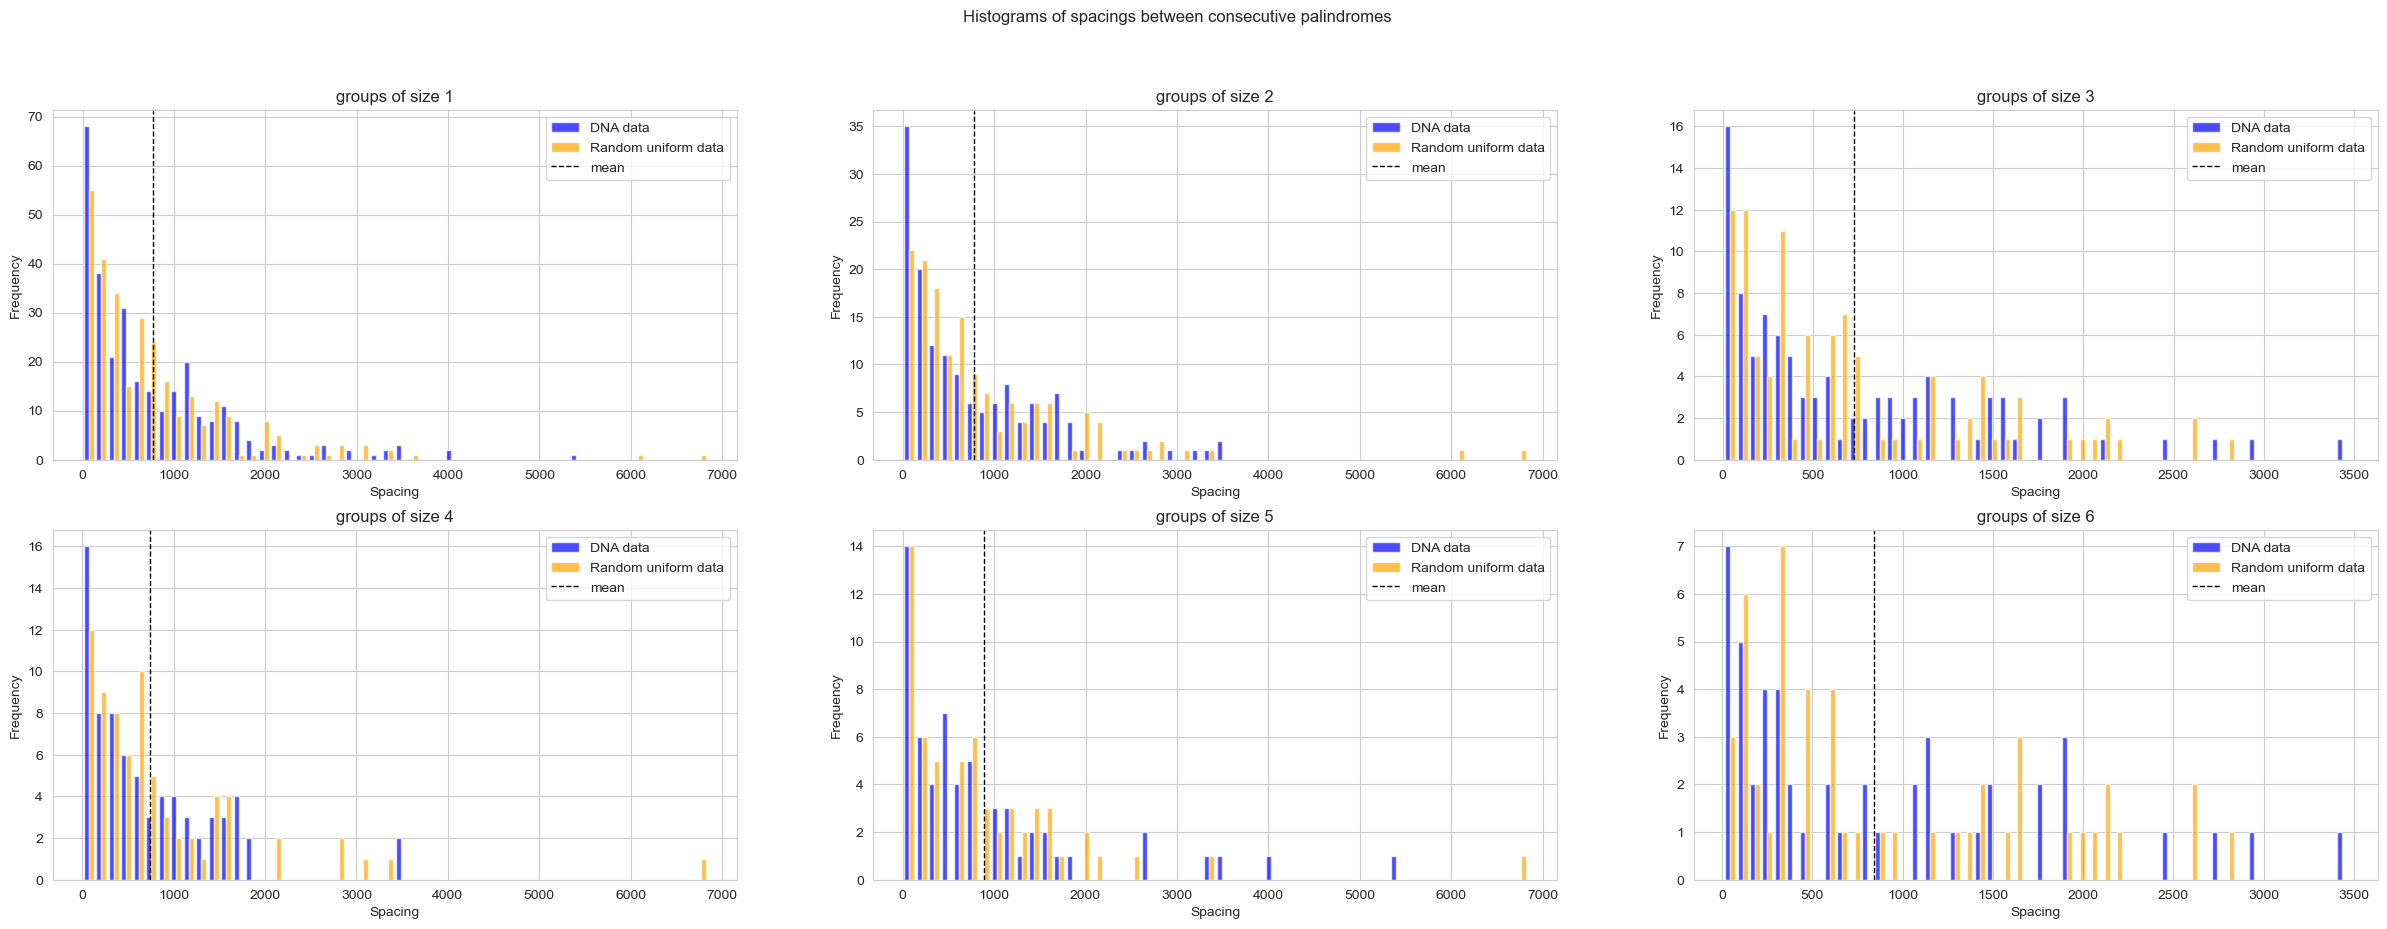

In [5]:
plot_spacing(DNA_data, random_uniform_data[0])

After comparing the spacing between consecutive palindromes in the CMV DNA sequence to what would be expected in a random scatter, no significant differences were observed. Therefore, the analysis proceeded to evaluate the number of palindromes in different intervals.

### Counts.
The investigation of the counts of palindromes in different regions of the DNA involved the use of graphical displays. The DNA was divided into non-overlapping regions of equal length to compare the observed counts of palindromes with the expected count from uniform random scatter.

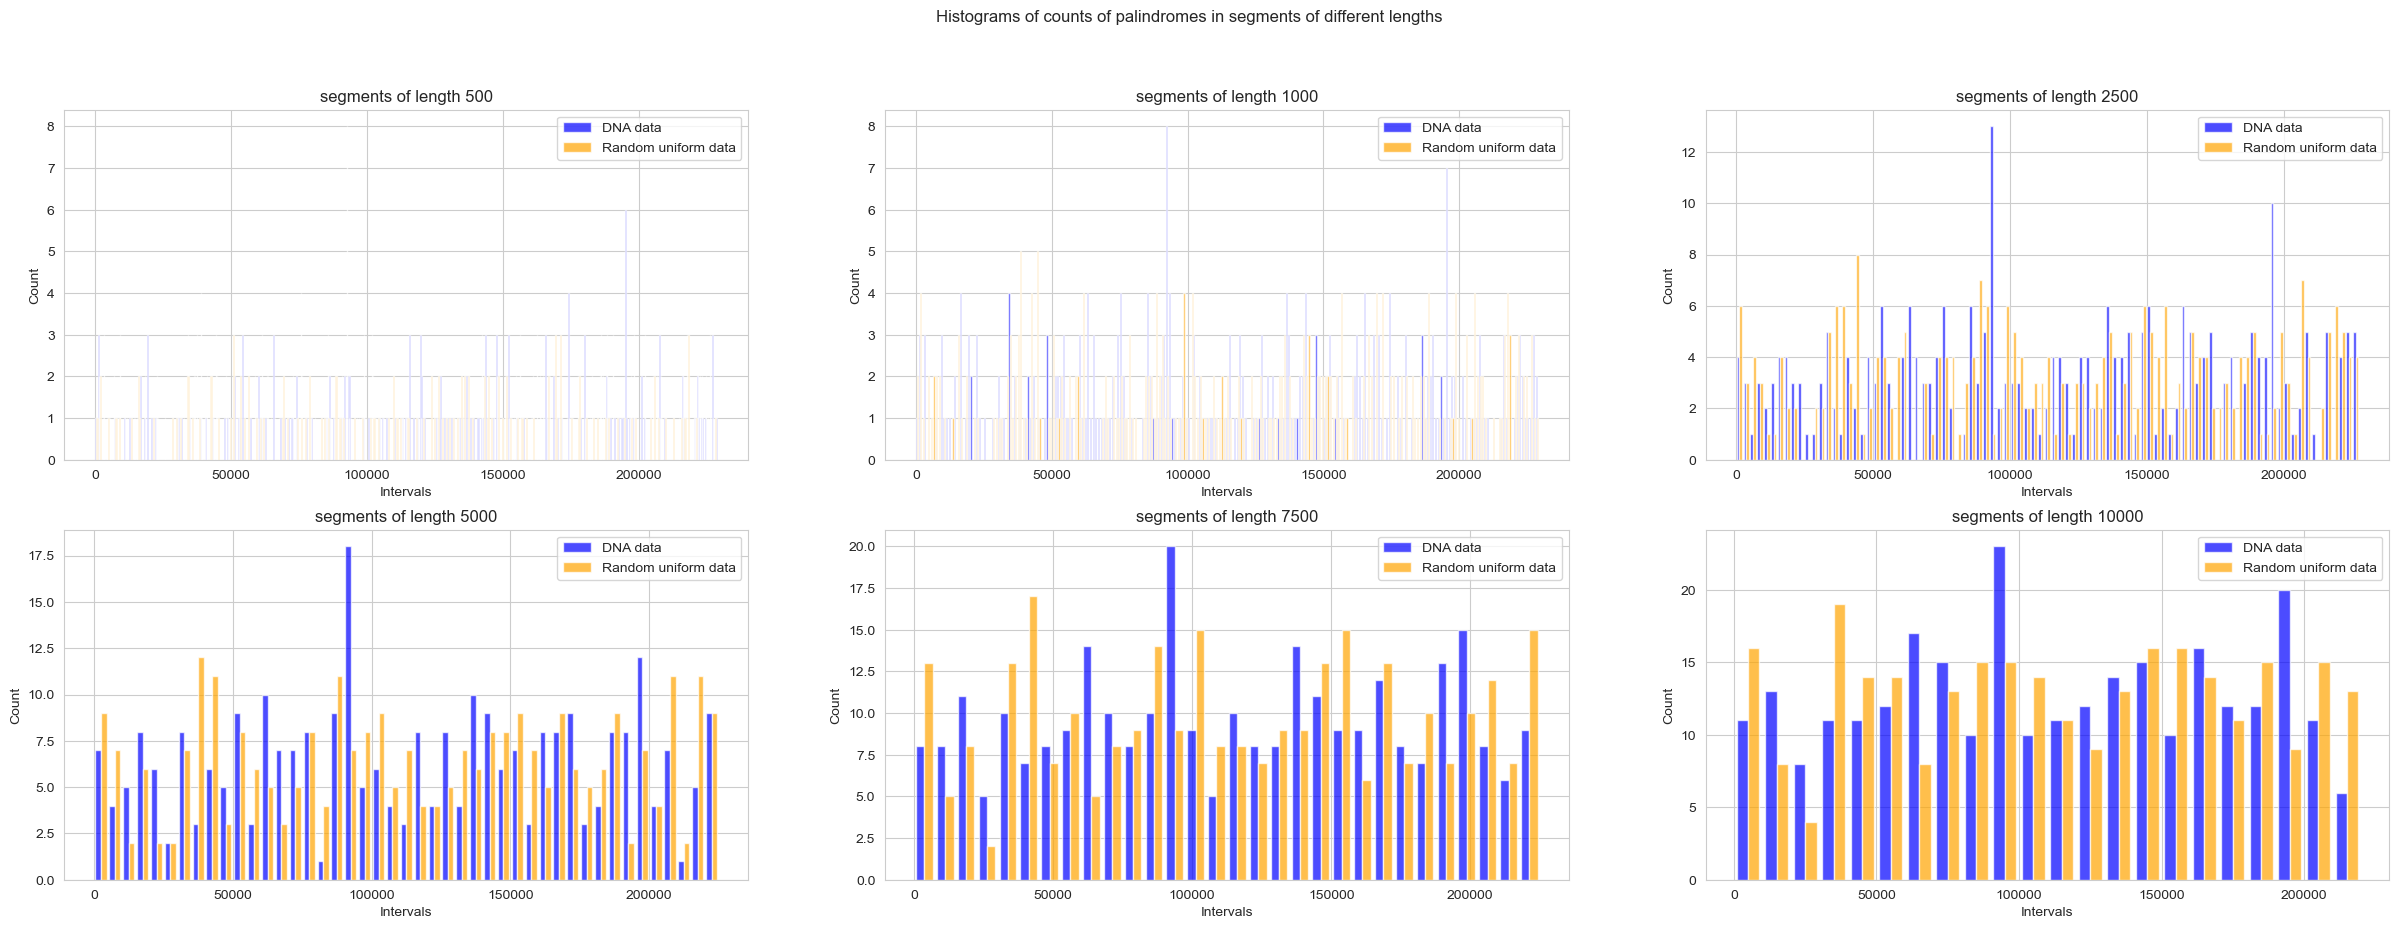

In [6]:
interval_len = [500, 1000, 2500, 5000, 7500, 10000]

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(30, 10))
fig.suptitle('Histograms of counts of palindromes in segments of different lengths')

for i, interval in enumerate(interval_len):
    axs[i // cols, i % cols].hist([DNA_data, random_uniform_data[0]], bins=range(0, dna_length, interval), label = ['DNA data', 'Random uniform data'], color= ['blue','orange'], alpha=0.7)
    axs[i // cols, i % cols].set_title('segments of length ' + str(interval))
    axs[i // cols, i % cols].set_xlabel('Intervals')
    axs[i // cols, i % cols].set_ylabel('Count')
    axs[i // cols, i % cols].legend()

### The biggets cluster.
In the provided histograms, it is evident that in the DNA data a significant cluster that is clearly visible in the range of interval sizes between 2500 and 5000. To further investigate this cluster, a detailed examination of the interval sizes within this range is required. One way to evaluate this is by calculating the mean of these sizes, which will provide a more accurate representations of the cluster size.

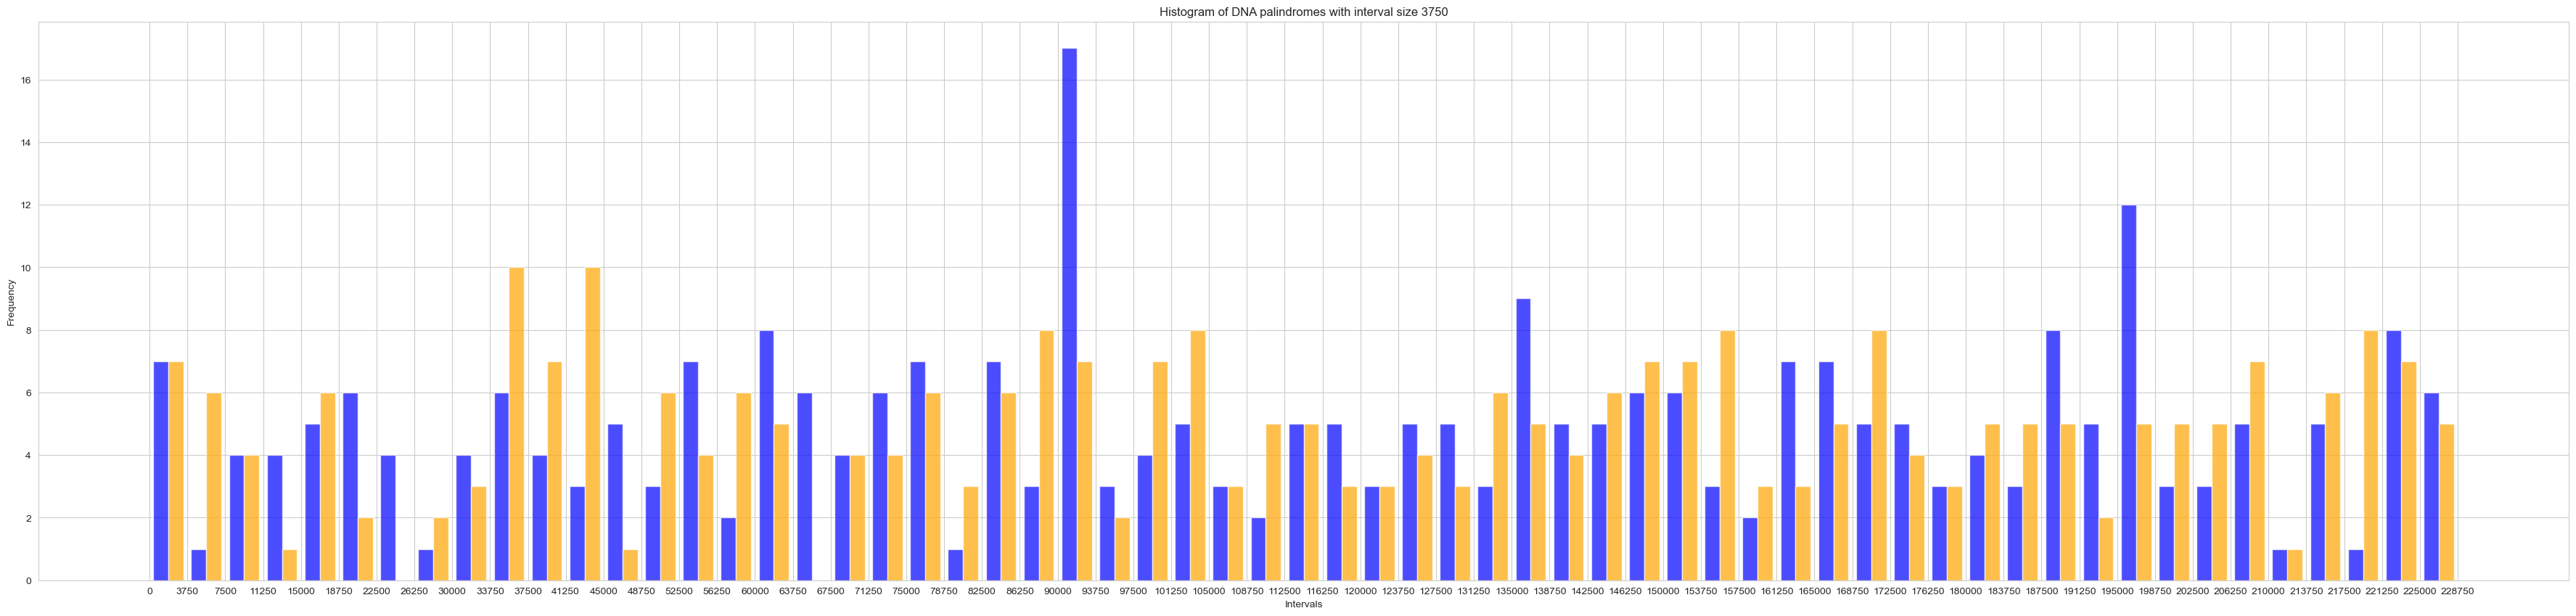

In [7]:
interval = (2500 + 5000) // 2

plt.figure(figsize=(45,10))
plt.title('Histogram of DNA palindromes with interval size ' + str(interval))
plt.hist([DNA_data, random_uniform_data[0]], bins=range(0, dna_length, interval), label = ['DNA data', 'Random uniform data'], color= ['blue','orange'], alpha=0.7)
plt.xticks(range(0, dna_length, interval))
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()


From this histogram it is clear that the most significant cluster is observed in the interval ranging between 90000 and 93750. This finding suggests that the palindromes are concentrated on this range, indicating that it may be a potential origin of replication. Based on this observation, it is recommended to begin evaluating the origin of replication from this interval.
